In [1151]:
import pandas as pd

# 讀取檔案
all_df = pd.read_csv("high_diamond_ranked_10min.csv")

# 刪除不必要的欄位
all_df = all_df.drop(
    [
        "gameId",
        "blueEliteMonsters",
        "blueGoldDiff",
        "blueExperienceDiff",
        "blueCSPerMin",
        "blueGoldPerMin",
        "redEliteMonsters",
        "redGoldDiff",
        "redFirstBlood",
        "redExperienceDiff",
        "redCSPerMin",
        "redGoldPerMin",
        "blueCSPerMin",
        "blueGoldPerMin",
    ],
    axis=1,
)
all_df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,9,8,0,0,0,16567,6.8,17047,197,55
1,0,12,1,0,5,5,5,0,0,0,...,5,2,1,1,1,17620,6.8,17438,240,52
2,0,15,0,0,7,11,4,1,0,0,...,7,14,0,0,0,17285,6.8,17254,203,28
3,0,43,1,0,4,5,5,0,1,0,...,4,10,0,0,0,16478,7.0,17961,235,47
4,0,75,4,0,6,6,6,0,0,0,...,6,7,1,0,0,17404,7.0,18313,225,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,0,0,...,7,7,0,0,0,15246,6.8,16498,229,34
9875,1,54,0,0,6,4,8,1,0,0,...,6,3,0,0,0,15456,7.0,18367,206,56
9876,0,23,1,0,6,7,5,0,0,0,...,6,11,1,0,0,18319,7.4,19909,261,60
9877,0,14,4,1,2,3,3,1,0,0,...,2,1,0,0,0,15298,7.2,18314,247,40


In [1152]:
import numpy as np

mask = np.random.rand(len(all_df)) < 0.8
train_df = all_df[mask]
test_df = all_df[~mask]
len(test_df)

1971

In [1681]:
from typing import Tuple
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))


def feature_preprocessing(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    # 把資料分開成特徵與標籤
    nd_array = df.values
    labels = nd_array[:, 0]  # 標籤
    data = nd_array[:, 1:]  # 特徵

    # 特徵縮放成0~1之間
    scaled_data = scaler.fit_transform(data)

    # OHE: one-hot encoding
    labels = to_categorical(labels)

    return scaled_data, labels


train_data, train_labels = feature_preprocessing(train_df)
test_data, test_labels = feature_preprocessing(test_df)
test_data

array([[0.05847953, 0.14285714, 1.        , ..., 0.6814563 , 0.78616352,
        0.52631579],
       [0.22222222, 0.14285714, 0.        , ..., 0.69487432, 0.63522013,
        0.59210526],
       [0.04678363, 0.04761905, 0.        , ..., 0.83200644, 0.57861635,
        0.48684211],
       ...,
       [0.04093567, 0.04761905, 0.        , ..., 0.78915824, 0.44025157,
        0.78947368],
       [0.05263158, 0.19047619, 1.        , ..., 0.70212005, 0.81761006,
        0.42105263],
       [0.07602339, 0.        , 1.        , ..., 0.61848108, 0.52830189,
        0.5       ]])

In [1685]:
"""
Model1
acc維持0.72
loss維持0.55
"""
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(3, input_dim=27, activation="softmax"))
model.add(Dense(32, activation="softmax"))
model.add(Dense(2, activation="sigmoid"))

# 使用 Adam 優化器
optimizer = Adam(0.01)

model.compile(optimizer=optimizer, metrics=["acc"], loss="categorical_crossentropy")

In [1686]:
"""
Model2
acc維持0.72
loss快速從0.45掉到0.18
"""
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from keras import regularizers

model = Sequential()

model.add(Input(shape=(27,)))
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(2, activation="relu"))

model.compile(optimizer="Adam", metrics=["acc"], loss="mean_squared_error")

In [1697]:
"""
Model3 Main use
acc維持0.73
loss快速從2.3掉到0.2
#train_data, train_labels, validation_split=0.55, epochs=256, batch_size=64, verbose=2
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

#MLP model sofmax
model = Sequential()

model.add(Input(shape=(27,)))
model.add(Dense(47, activation="relu"))
model.add(Dense(15, activation="relu",kernel_regularizer=regularizers.l1(0.023)))
model.add(Dense(2, activation="relu"))

model.compile(optimizer="Adam", metrics=["acc"], loss="mean_squared_error")

In [1694]:
"""
Model4
acc
loss
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

#MLP model sofmax
model = Sequential()

model.add(Input(shape=(27,)))
#model.add(Dense(57, activation="relu"))
model.add(Dense(37, activation="relu"))  #save1:47
model.add(Dense(16, activation="relu",kernel_regularizer=regularizers.l1(0.922)))#0.028
model.add(Dropout(0.12))
# model.add(Dense(16, activation="relu"))  # 修改隱藏層的神經元個數
model.add(Dense(2, activation="relu"))


sgd = SGD(0.0965, momentum=0.0973)  # 調整學習率和動量0.0086
optimizer = Adam(0.751)
model.compile(optimizer=sgd, metrics=["acc"], loss="mean_squared_error")

In [1689]:
'''
18
71
'''
import tensorflow
import pandas
model = tensorflow.keras.models.Sequential(
    [
        tensorflow.keras.layers.Flatten(input_shape=(27,)),
        tensorflow.keras.layers.Dense(64, activation="relu"),
        tensorflow.keras.layers.Dense(16, activation="relu"), #v
        tensorflow.keras.layers.Dense(4, activation="relu"), #v
        tensorflow.keras.layers.Dense(2, activation="sigmoid"),
    ]
)
model.compile(
    #28 72
    #optimizer=tensorflow.keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.015),
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, decay=0.007),
    loss=tensorflow.keras.losses.MeanAbsoluteError(),
    metrics=["acc"],
)

Epoch 1/200
68/68 - 0s - loss: 0.1847 - acc: 0.7310 - val_loss: 0.1823 - val_acc: 0.7294
Epoch 2/200
68/68 - 0s - loss: 0.1843 - acc: 0.7349 - val_loss: 0.1840 - val_acc: 0.7305
Epoch 3/200
68/68 - 0s - loss: 0.1850 - acc: 0.7305 - val_loss: 0.1827 - val_acc: 0.7303
Epoch 4/200
68/68 - 0s - loss: 0.1844 - acc: 0.7294 - val_loss: 0.1822 - val_acc: 0.7303
Epoch 5/200
68/68 - 0s - loss: 0.1847 - acc: 0.7330 - val_loss: 0.1822 - val_acc: 0.7297
Epoch 6/200
68/68 - 0s - loss: 0.1843 - acc: 0.7337 - val_loss: 0.1820 - val_acc: 0.7300
Epoch 7/200
68/68 - 0s - loss: 0.1847 - acc: 0.7312 - val_loss: 0.1822 - val_acc: 0.7294
Epoch 8/200
68/68 - 0s - loss: 0.1850 - acc: 0.7301 - val_loss: 0.1822 - val_acc: 0.7294
Epoch 9/200
68/68 - 0s - loss: 0.1845 - acc: 0.7296 - val_loss: 0.1819 - val_acc: 0.7294
Epoch 10/200
68/68 - 0s - loss: 0.1842 - acc: 0.7342 - val_loss: 0.1819 - val_acc: 0.7308
Epoch 11/200
68/68 - 0s - loss: 0.1842 - acc: 0.7294 - val_loss: 0.1823 - val_acc: 0.7289
Epoch 12/200
68/68 

68/68 - 0s - loss: 0.1837 - acc: 0.7326 - val_loss: 0.1859 - val_acc: 0.7249
Epoch 93/200
68/68 - 0s - loss: 0.1847 - acc: 0.7328 - val_loss: 0.1813 - val_acc: 0.7297
Epoch 94/200
68/68 - 0s - loss: 0.1840 - acc: 0.7340 - val_loss: 0.1817 - val_acc: 0.7311
Epoch 95/200
68/68 - 0s - loss: 0.1841 - acc: 0.7340 - val_loss: 0.1832 - val_acc: 0.7283
Epoch 96/200
68/68 - 0s - loss: 0.1840 - acc: 0.7307 - val_loss: 0.1813 - val_acc: 0.7291
Epoch 97/200
68/68 - 0s - loss: 0.1834 - acc: 0.7333 - val_loss: 0.1816 - val_acc: 0.7311
Epoch 98/200
68/68 - 0s - loss: 0.1839 - acc: 0.7324 - val_loss: 0.1815 - val_acc: 0.7297
Epoch 99/200
68/68 - 0s - loss: 0.1835 - acc: 0.7344 - val_loss: 0.1813 - val_acc: 0.7305
Epoch 100/200
68/68 - 0s - loss: 0.1832 - acc: 0.7337 - val_loss: 0.1814 - val_acc: 0.7294
Epoch 101/200
68/68 - 0s - loss: 0.1835 - acc: 0.7367 - val_loss: 0.1819 - val_acc: 0.7314
Epoch 102/200
68/68 - 0s - loss: 0.1835 - acc: 0.7310 - val_loss: 0.1813 - val_acc: 0.7300
Epoch 103/200
68/68 

Epoch 183/200
68/68 - 0s - loss: 0.1836 - acc: 0.7284 - val_loss: 0.1813 - val_acc: 0.7283
Epoch 184/200
68/68 - 0s - loss: 0.1823 - acc: 0.7365 - val_loss: 0.1824 - val_acc: 0.7294
Epoch 185/200
68/68 - 0s - loss: 0.1825 - acc: 0.7349 - val_loss: 0.1845 - val_acc: 0.7286
Epoch 186/200
68/68 - 0s - loss: 0.1827 - acc: 0.7363 - val_loss: 0.1818 - val_acc: 0.7322
Epoch 187/200
68/68 - 0s - loss: 0.1827 - acc: 0.7333 - val_loss: 0.1821 - val_acc: 0.7297
Epoch 188/200
68/68 - 0s - loss: 0.1826 - acc: 0.7333 - val_loss: 0.1818 - val_acc: 0.7314
Epoch 189/200
68/68 - 0s - loss: 0.1827 - acc: 0.7360 - val_loss: 0.1816 - val_acc: 0.7294
Epoch 190/200
68/68 - 0s - loss: 0.1825 - acc: 0.7363 - val_loss: 0.1818 - val_acc: 0.7280
Epoch 191/200
68/68 - 0s - loss: 0.1826 - acc: 0.7326 - val_loss: 0.1814 - val_acc: 0.7294
Epoch 192/200
68/68 - 0s - loss: 0.1830 - acc: 0.7376 - val_loss: 0.1815 - val_acc: 0.7266
Epoch 193/200
68/68 - 0s - loss: 0.1826 - acc: 0.7340 - val_loss: 0.1830 - val_acc: 0.7317

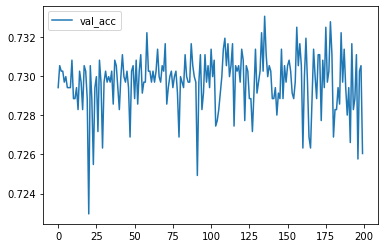

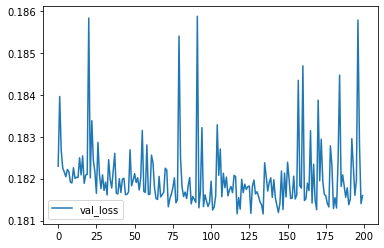

In [1699]:
import matplotlib.pyplot as plt

history = model.fit(
    train_data, train_labels, validation_split=0.45, epochs=200, batch_size=64, verbose=2
    #train_data, train_labels, validation_split=0.15, epochs=100, batch_size=128, verbose=2 #AK
)


# 輸出圖表
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [1691]:
test = pd.read_csv("test.csv")

scaled_data = scaler.transform(test)
predicted_temperatures = model.predict(scaled_data)

predicted_temperatures

[[0.00213895 0.99986494]]


/home/aucsie/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [1702]:
predicted_temperatures = model.predict(test_data)

predicted_temperatures

array([[0.525212  , 0.46875507],
       [0.726928  , 0.26740983],
       [0.9048557 , 0.08596726],
       ...,
       [0.77904314, 0.21541423],
       [0.5456073 , 0.4476546 ],
       [0.47644213, 0.51787496]], dtype=float32)